# week3 事前課題　アヤメ

## 注意: エラーも消さずに残しています

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV


In [2]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline

import pandas_profiling as pdp #pandas report

# pdp.ProfileReport(df)  #分析してくれる

import cv2



### 【問題1】データの取得

In [3]:
import sklearn
import sklearn.datasets

In [4]:
data = sklearn.datasets.load_iris()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
len(data)

6

In [7]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [8]:
train, target = sklearn.datasets.load_iris(return_X_y=True)

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
pd.DataFrame(train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X=pd.DataFrame(train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [12]:
y=pd.DataFrame(target, columns=['Species'])

In [13]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


### 【問題2】データの結合

In [14]:
df=pd.concat([X, y], axis=1)

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 【問題3】データの確認

In [16]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


5列、150行
最初の4列は空白のないfloat64
最後の1列は空白のないint64

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
Species         150
dtype: int64

In [20]:
df.isnull().head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [21]:
df.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

In [22]:
df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
Species         1.000000
dtype: float64

In [23]:
df.min()

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
Species         0.0
dtype: float64

In [24]:
df.isnull().describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150,150,150,150,150
unique,1,1,1,1,1
top,False,False,False,False,False
freq,150,150,150,150,150


In [25]:
ser = pd.Series([5, 6, np.NaN])

In [26]:
ser.isnull().describe()

count         3
unique        2
top       False
freq          2
dtype: object

In [27]:
ser

0    5.0
1    6.0
2    NaN
dtype: float64

In [28]:
ser.isnull()

0    False
1    False
2     True
dtype: bool

### 問題4 irisデータセット自体の調査

アヤメ

https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%A4%E3%83%A1

アヤメ類の総称として、厳密なアヤメ以外の種別にあたる、ハナショウブやカキツバタを、アヤメと呼称する習慣が一般的に広まっている

堀切菖蒲園には、アヤメ・カキツバタ・ハナショウブの見分け方として、次の記述の掲示がある（2005年6月現在）。

iris dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

### 【問題5】必要なデータを抽出

DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

sepal_widthの列を３つの異なる方法で抽出する  
50番目から99番目までのデータを抽出する  
petal_lengthの列の50番目から99番目までのデータを抽出する  
petal_widthの値が0.2のデータを抽出する  
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

■ 違い
行、列の指定方法　　

loc　行ラベル、 列ラベル  
iloc　行の番号(0 ~ )、列の番号(0 ~ )  
ix　行ラベル、列ラベル または 行の番号(0 ~ )、列の番号(0 ~ )  　　

In [29]:
df_1=df.iloc[50:100]
df_1

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [30]:
df.iloc[50:100, 2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [31]:
df_1.loc[: , ['petal_length']]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [32]:
df.loc[:, ['petal_length']].iloc[50:100]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [33]:
df.query('petal_width == 0.2')

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [34]:
df.query('petal_width < 0.2')

,sepal_length,sepal_width,petal_length,petal_width,Species
9,4.9,3.1,1.5,0.1,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
32,5.2,4.1,1.5,0.1,0
37,4.9,3.6,1.4,0.1,0


In [35]:
df_2=df.query('petal_width == 0.2').query('sepal_length > 5')
df_2

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
14,5.8,4.0,1.2,0.2,0
20,5.4,3.4,1.7,0.2,0
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
33,5.5,4.2,1.4,0.2,0
36,5.5,3.5,1.3,0.2,0
39,5.1,3.4,1.5,0.2,0
46,5.1,3.8,1.6,0.2,0


### 【問題6】図の作成

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する  
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する  

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [36]:
df.iloc[0, :]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Species         0.0
Name: 0, dtype: float64

In [37]:
count = df.count().values
count

array([150, 150, 150, 150, 150])

In [38]:
label = df.columns.values
label

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'], dtype=object)

([<matplotlib.patches.Wedge at 0x1a23750198>,
 [Text(0.8899186877588753, 0.6465637858537406, 'sepal_length'),
  Text(-0.3399187231970732, 1.046162158377023, 'sepal_width'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'petal_length'),
  Text(-0.33991862524830174, -1.0461621902025062, 'petal_width'),
  Text(0.8899187482945414, -0.6465637025335373, 'Species')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.0%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.0%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.0%'),
  Text(0.4854102263424771, -0.35267111047283856, '20.0%')])

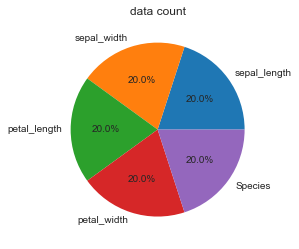

In [39]:
plt.title('data count')
plt.pie(count, labels=label, autopct="%.1f%%")

([<matplotlib.patches.Wedge at 0x1a237dde48>,
 [Text(1.0517220855332163, 0.764120837827148, 'sepal_length'),
  Text(-0.3399187231970732, 1.046162158377023, 'sepal_width'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'petal_length'),
  Text(-0.33991862524830174, -1.0461621902025062, 'petal_width'),
  Text(0.8899187482945414, -0.6465637025335373, 'Species')],
 [Text(0.6472135910973638, 0.4702282078936295, '20.0%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.0%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.0%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.0%'),
  Text(0.4854102263424771, -0.35267111047283856, '20.0%')])

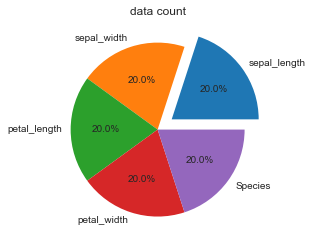

In [40]:
plt.title('data count')
plt.pie(count, labels=label, explode=[0.2, 0, 0, 0, 0], autopct="%.1f%%")

In [41]:
df_1=df.iloc[:, 1]
df_1.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [42]:
df_1.values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23926e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23939828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23926cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23939f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a239432e8>],
 'means': []}

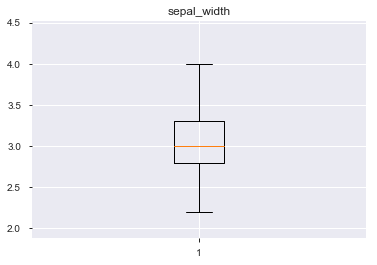

In [43]:
plt.title('sepal_width')
plt.boxplot(df_1)

In [44]:
df_np=df.values
df_np[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [45]:
label

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'], dtype=object)

In [46]:
label_1=str(label)
label_1

"['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'Species']"

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2399af98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2399d978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2399ae10>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2399de10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a23a1b438>,
 'means': []}

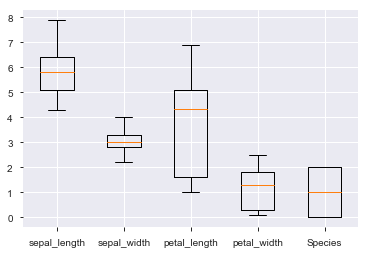

In [47]:
plt.boxplot(df_np, labels=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'Species'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23ac2860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23ac2f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23ac2438>,
 'medians': [<matplotlib.lines.Line2D at 0x1a23ac86a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a23ac8a20>,
 'means': []}

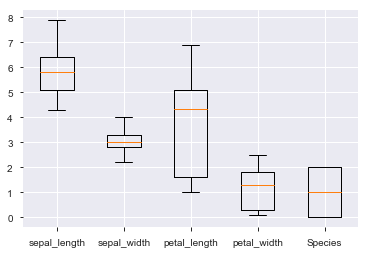

In [48]:
plt.boxplot(df_np, labels=label)

In [49]:
sns.set(style='whitegrid')
# tips = sns.load_dataset('tips')

# # 支払額のバイオリン図を作成する。
# ax = sns.violinplot(x=tips['total_bill'])

/Users/ikono/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


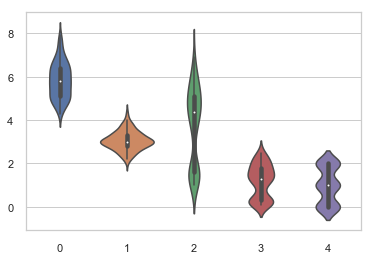

In [50]:
ax = sns.violinplot(data=df.values)

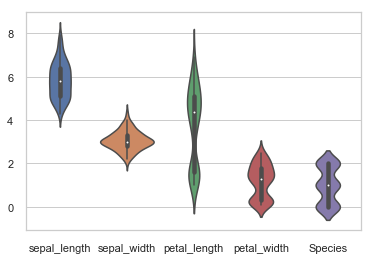

In [51]:
ax = sns.violinplot(data=df)

In [52]:
ax = sns.violinplot(x='length', data=df)

ValueError: Could not interpret input 'length'

## 箱ひげ図とバイオリン図



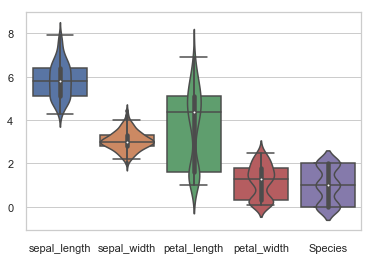

In [53]:
ax = sns.violinplot(data=df)
ax = sns.boxplot(data=df)

箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる。これはデータ分布がmultimodal（複数のピークがある）場合に特に有用である。このような場合、バイオリン図では複数のピークの位置と大きさが明確に表現されるが、これは箱ひげ図では表現されない。バイオリン図の内部には平均（または中央値）と四分位範囲が描かれる。特にサンプル数があまり多くない場合には、すべてのサンプルデータが点や線として描かれる場合もある。

箱ひげ図よりも多くの情報が含まれるものの、バイオリン図はよりマイナーである点が欠点である。知名度が低いため、バイオリン図を知らない人にとっては意味が理解しづらい。
 
 https://ja.wikipedia.org/wiki/%E3%83%90%E3%82%A4%E3%82%AA%E3%83%AA%E3%83%B3%E5%9B%B3

In [54]:
#df_1.loc[: , ['petal_length']]
df2=df.loc[:, ['sepal_length', 'sepal_width', 'Species']]
df2.head()

,sepal_length,sepal_width,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [55]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

/Users/ikono/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ikono/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ikono/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


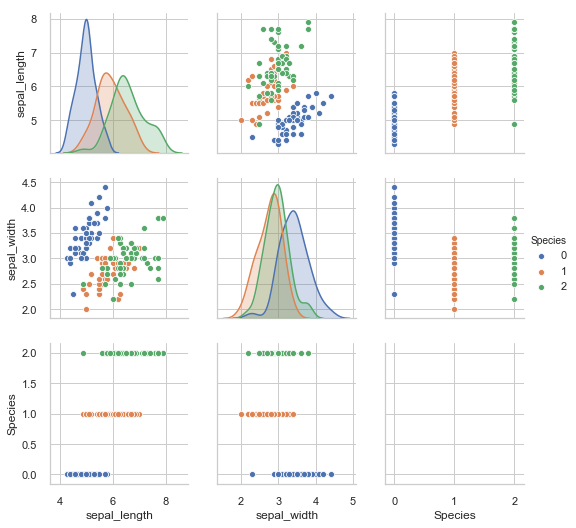

In [56]:
sns.pairplot(df2, hue="Species")

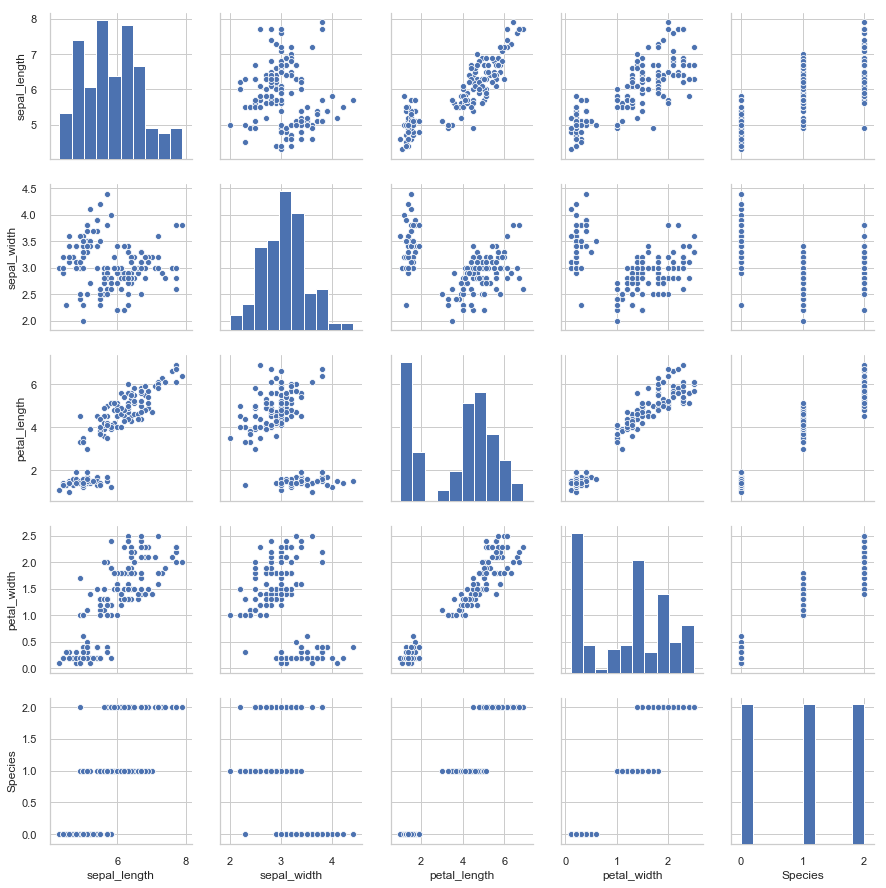

In [57]:
sns.pairplot(df)

In [58]:
sns.get_dataset_names()

/Users/ikono/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/ikono/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [59]:
sns.get_dataset_names()
iris = sns.load_data("iris") 

/Users/ikono/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/ikono/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


AttributeError: module 'seaborn' has no attribute 'load_data'

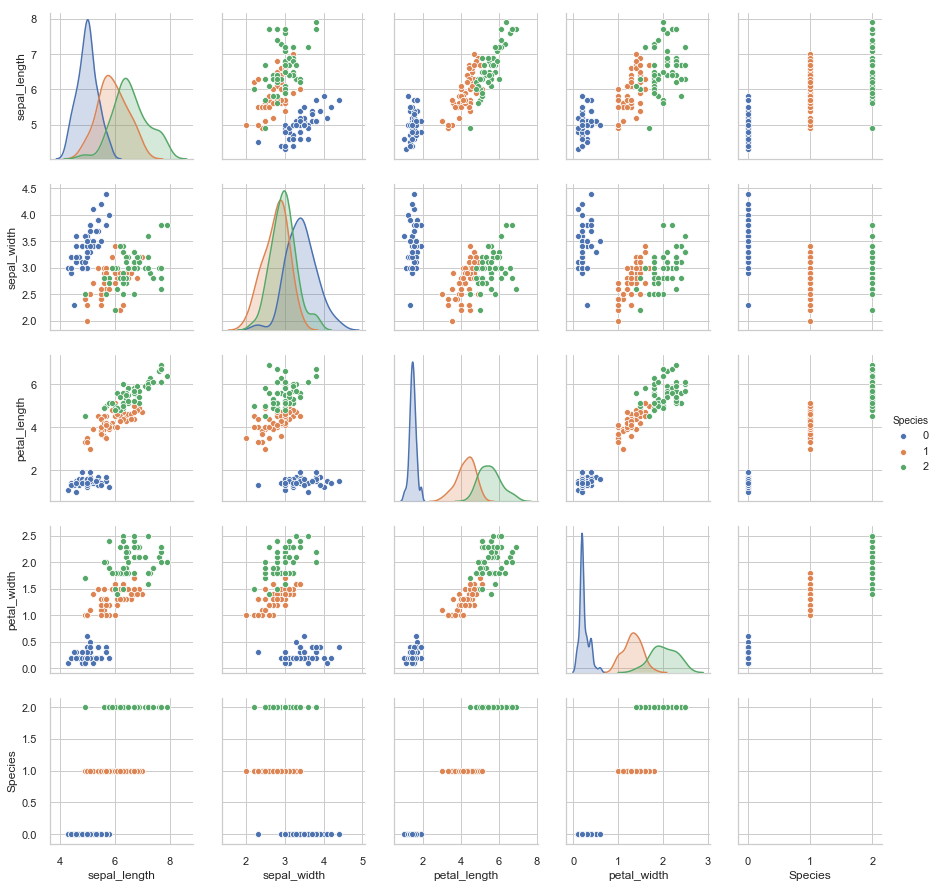

In [60]:
sns.pairplot(df, hue="Species")

### 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。  

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る  
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る  
４つの特徴量に関する相関係数行列を作る  
相関係数行列のヒートマップを作る  
相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

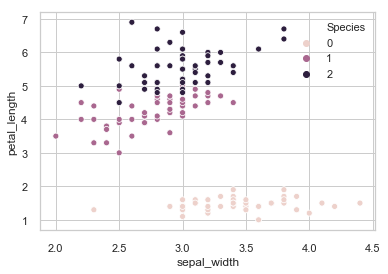

In [70]:
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], hue=df.iloc[:, 4])

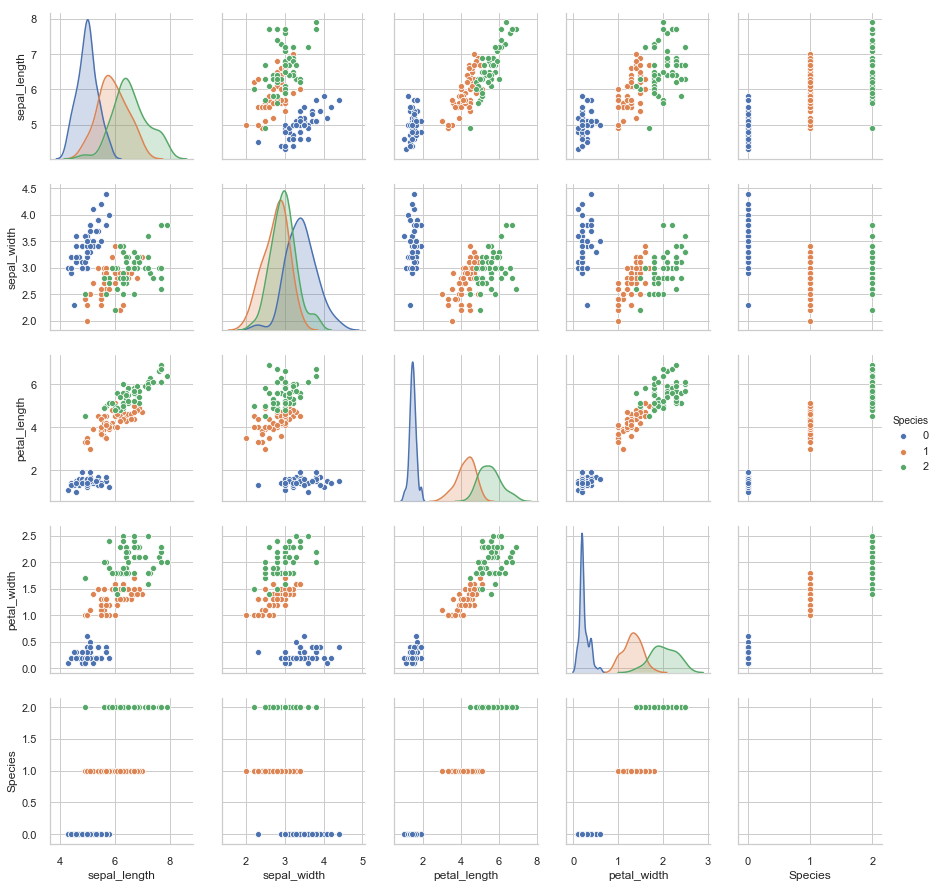

In [78]:
df2 = df.iloc[:, :-1]
sns.pairplot(df, hue='Species')

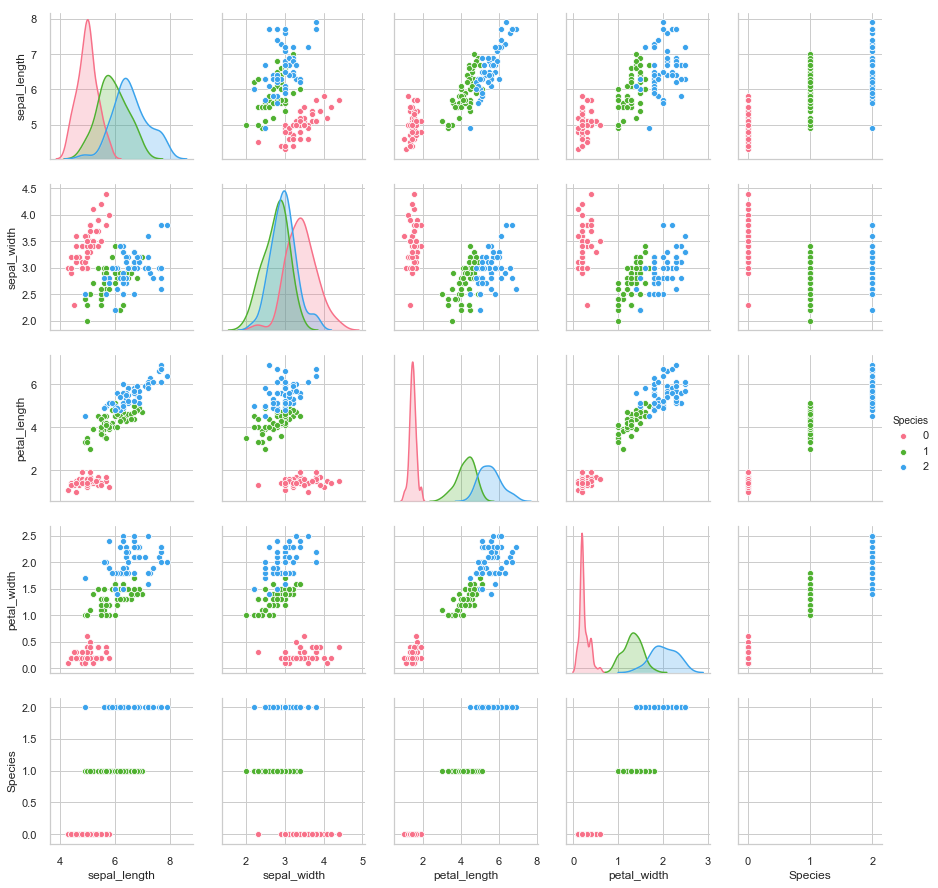

In [79]:
sns.pairplot(df, hue='Species', palette='husl')

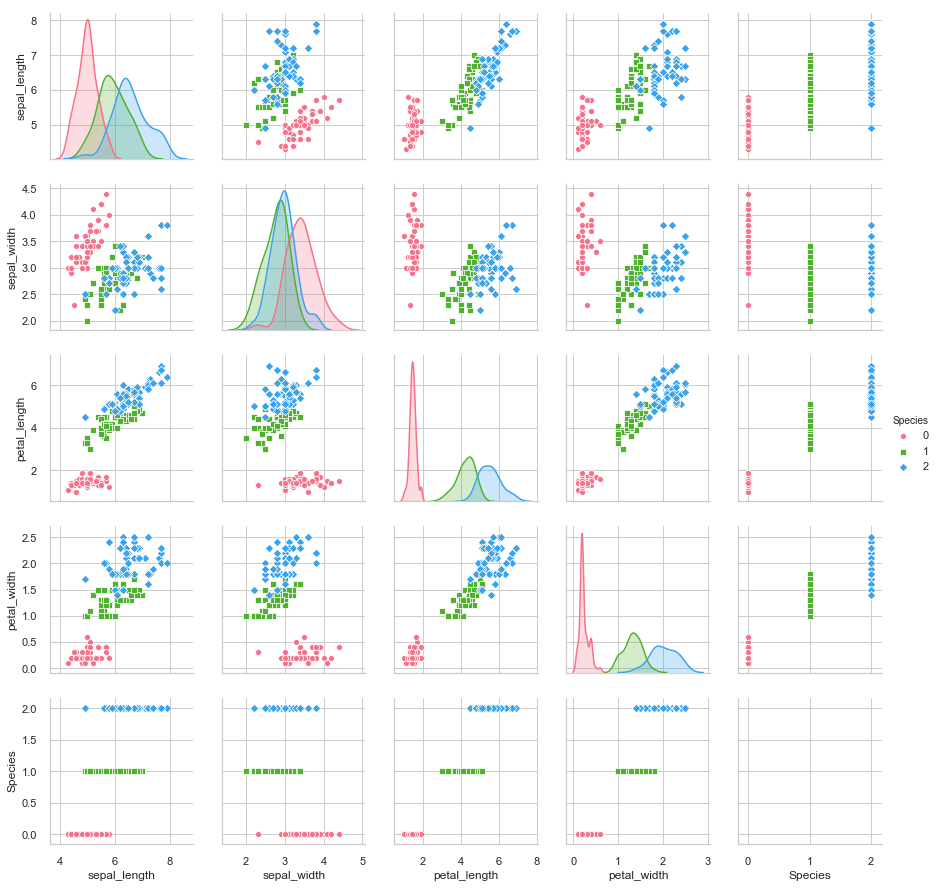

In [80]:
sns.pairplot(df, hue='Species', palette='husl', markers=['o', 's', 'D'])

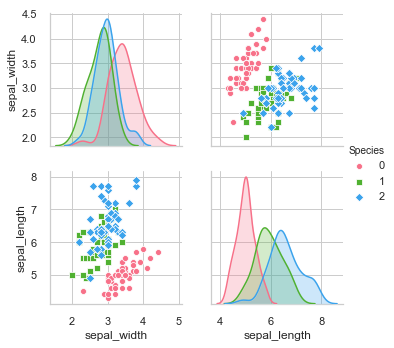

In [81]:
sns.pairplot(df, hue='Species', palette='husl', markers=['o', 's', 'D'], vars=['sepal_width', 'sepal_length'])

In [83]:
df.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

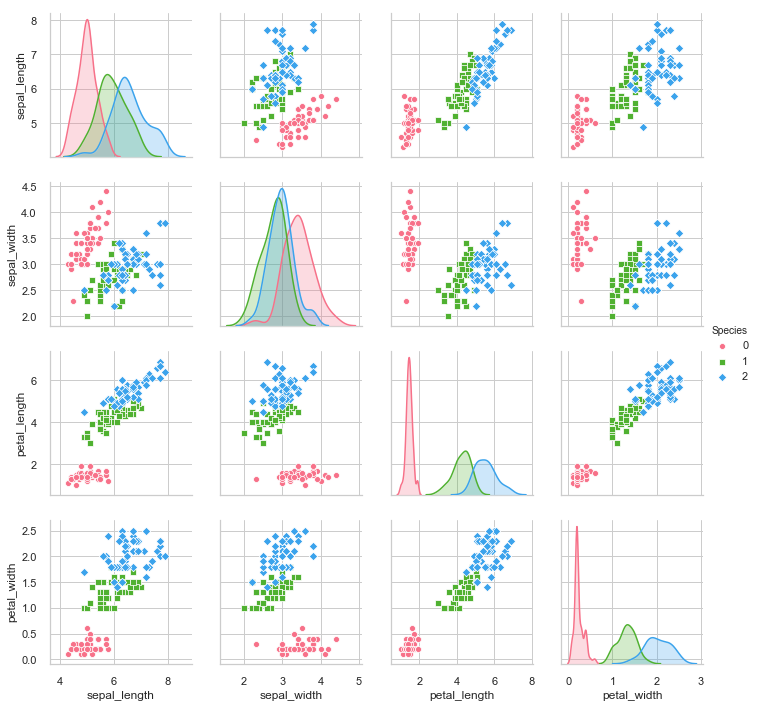

In [84]:
sns.pairplot(df, hue='Species', palette='husl', markers=['o', 's', 'D'], vars=df.columns[:-1])

In [86]:
corr_matrix=df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


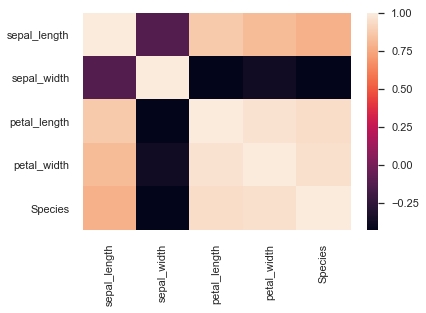

In [87]:
sns.heatmap(corr_matrix)

In [88]:
df_species_0=df.query('Species == 0')

In [89]:
df_species_0.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,0.742547,0.267176,0.278098,NaN
sepal_width,0.742547,1.000000,0.177700,0.232752,NaN
petal_length,0.267176,0.177700,1.000000,0.331630,NaN
petal_width,0.278098,0.232752,0.331630,1.000000,NaN
Species,NaN,NaN,NaN,NaN,NaN


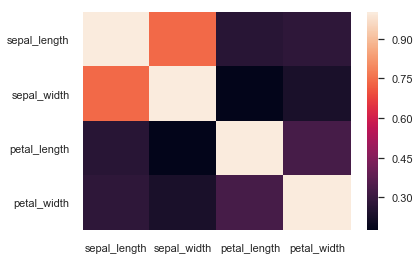

In [91]:
sns.heatmap(df_species_0.iloc[:, :-1].corr())

In [93]:
df_species_1  = df.query('Species == 1')
df_species_1.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,0.525911,0.754049,0.546461,NaN
sepal_width,0.525911,1.000000,0.560522,0.663999,NaN
petal_length,0.754049,0.560522,1.000000,0.786668,NaN
petal_width,0.546461,0.663999,0.786668,1.000000,NaN
Species,NaN,NaN,NaN,NaN,NaN


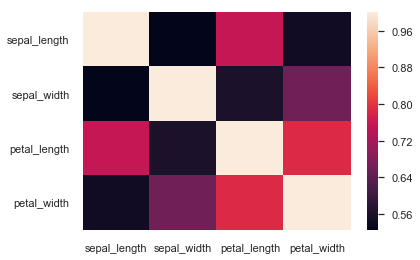

In [94]:
sns.heatmap(df_species_1.iloc[:, :-1].corr())

In [95]:
df_species_2  = df.query('Species == 2')
df_species_2.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,0.457228,0.864225,0.281108,NaN
sepal_width,0.457228,1.000000,0.401045,0.537728,NaN
petal_length,0.864225,0.401045,1.000000,0.322108,NaN
petal_width,0.281108,0.537728,0.322108,1.000000,NaN
Species,NaN,NaN,NaN,NaN,NaN


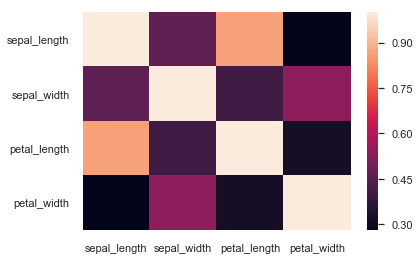

In [96]:
sns.heatmap(df_species_2.iloc[:, :-1].corr())

In [97]:
img=cv2.imread('01.png')

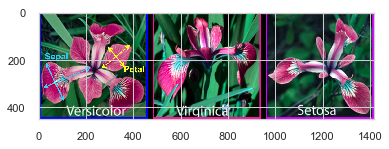

In [101]:
plt.imshow(img)

# 考察
## 相関係数
・ ３種類を総合するとミスリーディングとなる（負の相関係数もある）
・ 別々に見ると相関係数は全て正。これはある意味当然で、「大きい花は、どこを測定しても大きい（全体→局所」となっている
　
## 散布図
・ 分かりやすい
・ S0（以下、Species = 0 をS0のように記載する）は、特に判別しやすく、petal length/widthで完全にS1, S2と分離できる
・　つまり、petalが小さいものがS0である
・ 写真からもSetosaのpetalは小さいので理にかなっている
・ S1とS2は分離が難しいが、petal length/widthの両方で分離するのがよい（Sepalは厳しい）。
・ つまりpetal length/widthがある一定以上であればS2と判断する
・ その場合、相関係数が気になるが、S1は0.78だが、S2は0.32なので、２つの値で分離する意味はあると思われる（
